In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('../../../data/gridSearch.csv')
data = data.drop('feature_ratio', axis=1)
data = data.drop('sample_ratio', axis=1)
data = data.fillna(0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22520\1884404510.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

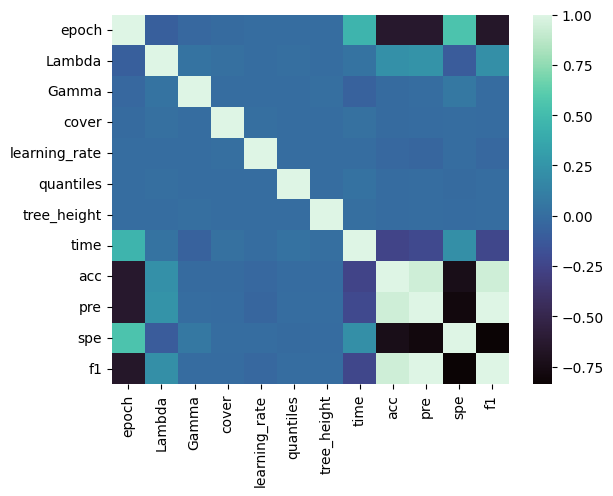

In [5]:
cor = data.corr()
sns.heatmap(cor, cmap = 'mako')

In [6]:
cor_acc = cor['acc']
cor_f1 = cor['f1']

<BarContainer object of 12 artists>

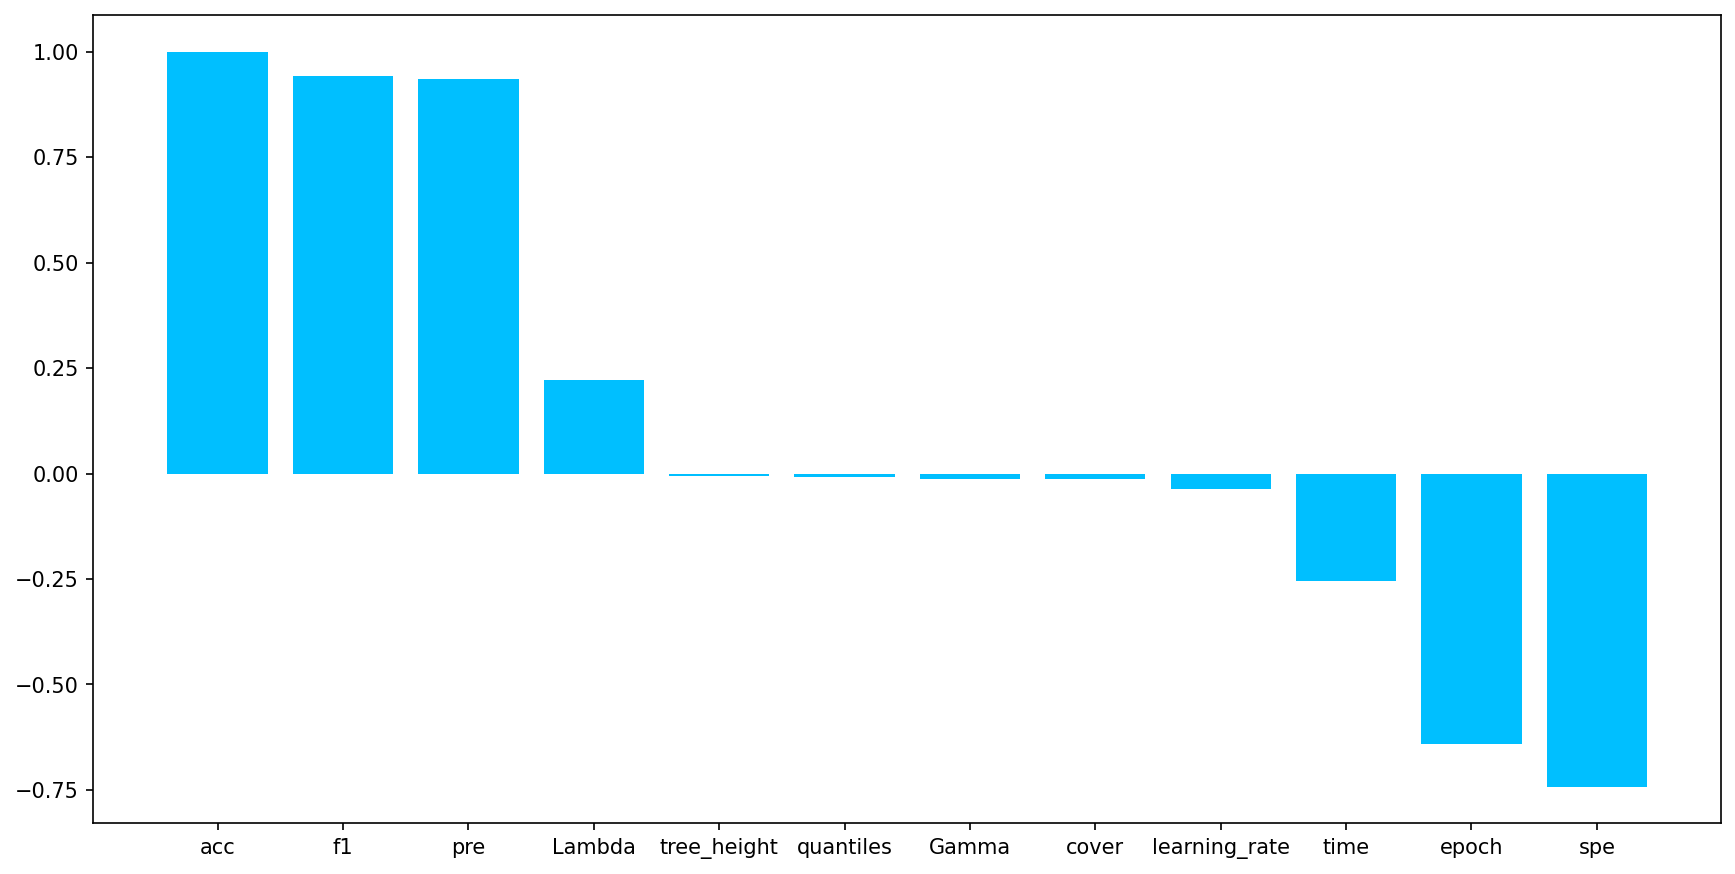

In [7]:
cor_acc_sorted = cor_acc.sort_values(ascending=False)
fig = plt.figure(figsize=(14, 7), dpi=150)
plt.bar(pd.DataFrame(cor_acc_sorted).index, cor_acc_sorted, color="deepskyblue")

<BarContainer object of 12 artists>

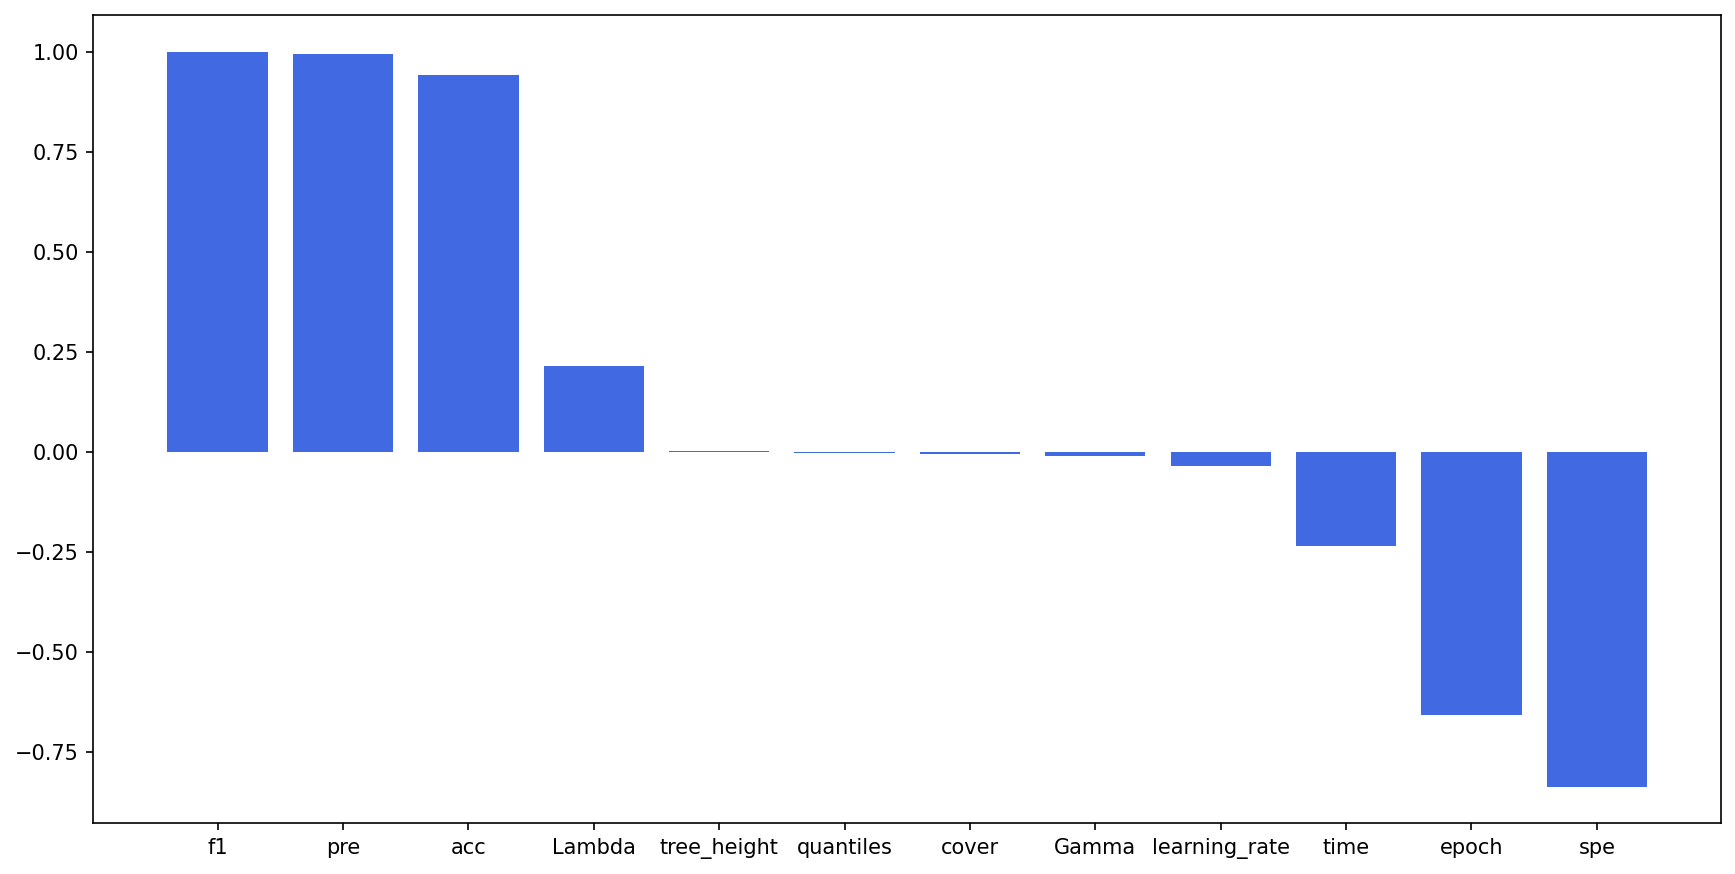

In [8]:
cor_f1_sorted = cor_f1.sort_values(ascending=False)
fig = plt.figure(figsize=(14, 7), dpi=150)
plt.bar(pd.DataFrame(cor_f1_sorted).index, cor_f1_sorted, color="royalblue")

group1: acc - lambda & learning rate

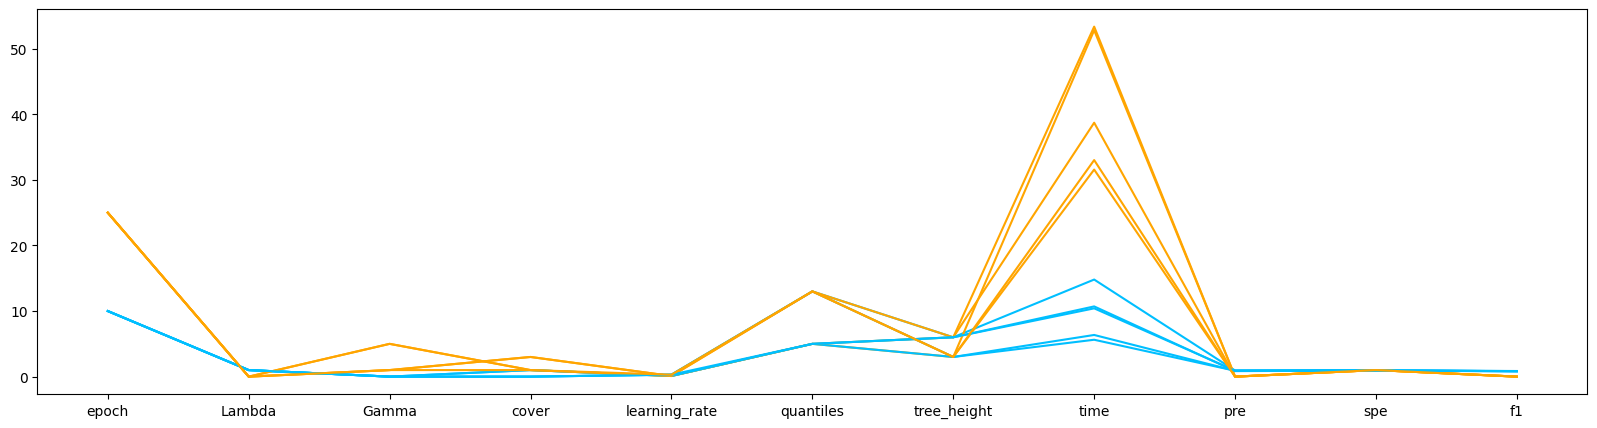

In [9]:
best_rows = data.sort_values("acc", ascending=False).iloc[:5, :]
best_rows_accs = best_rows['acc']
best_rows = best_rows.drop(['acc', 'confusion'], axis=1)

worst_rows = data.sort_values("acc", ascending=False).iloc[-5:, :]
worst_rows_accs = worst_rows['acc']
worst_rows = worst_rows.drop(['acc', 'confusion'], axis=1)

fig = plt.figure(figsize=(20, 5))
for i in range(best_rows.shape[0]):
    plt.plot(best_rows.iloc[i, :], color="deepskyblue")
    plt.plot(worst_rows.iloc[i, :], color="orange")

In [11]:
pd.concat([best_rows_accs, best_rows], axis=1)

,acc,epoch,Lambda,Gamma,cover,learning_rate,quantiles,tree_height,time,pre,spe,f1
135,0.900000,10,1,0,0,0.3,13,6,14.806438,0.931034,0.964286,0.857143
134,0.888889,10,1,0,0,0.3,13,3,6.356227,0.900000,0.946429,0.843750
136,0.877778,10,1,0,1,0.1,5,3,5.625883,0.896552,0.946429,0.825397
137,0.877778,10,1,0,1,0.1,5,6,10.414668,0.925926,0.964286,0.819672
133,0.866667,10,1,0,0,0.3,5,6,10.709795,0.843750,0.910714,0.818182


In [12]:
pd.concat([worst_rows_accs, worst_rows], axis=1)

,acc,epoch,Lambda,Gamma,cover,learning_rate,quantiles,tree_height,time,pre,spe,f1
304,0.588889,25,0,1,3,0.1,5,3,31.576241,0.0,1.0,0.0
331,0.588889,25,0,5,1,0.1,13,6,53.378531,0.0,1.0,0.0
305,0.588889,25,0,1,3,0.1,5,6,38.725702,0.0,1.0,0.0
330,0.588889,25,0,5,1,0.1,13,3,52.826486,0.0,1.0,0.0
302,0.588889,25,0,1,1,0.3,13,3,33.025377,0.0,1.0,0.0
